# Include necesary scripts and modules

In [1]:
cd("C:/Users/mjbarillas/Documents/GitHub/Mimosa/")

In [2]:
include("C:/Users/mjbarillas/Documents/GitHub/Mimosa/scripts/MB Ex/kPCA/PB/10S/ex2_a_kPCA_PB_10S.jl")

Dif (generic function with 1 method)

In [52]:
include("C:/Users/mjbarillas/Documents/GitHub/Mimosa/scripts/MB Ex/PB_10S/ex_stat_EM_PB_10S_SIUnits_a.jl")

plt_cl (generic function with 1 method)

In [62]:
using PlotlyJS

In [69]:
config = PlotConfig(
    toImageButtonOptions=attr(
        format="svg", # one of png, svg, jpeg, webp
        filename="custom_image",
        height=700,
        width=700,
        scale=1 # Multiply title/legend/axis/canvas sizes by this factor
    ).fields
)

PlotConfig
  scrollZoom: Bool true
  editable: Bool false
  staticPlot: Bool false
  toImageButtonOptions: Dict{Symbol, Any}
  displayModeBar: Nothing nothing
  modeBarButtonsToRemove: Nothing nothing
  modeBarButtonsToAdd: Nothing nothing
  modeBarButtons: Nothing nothing
  showLink: Bool false
  plotlyServerURL: Nothing nothing
  linkText: Nothing nothing
  showEditInChartStudio: Nothing nothing
  locale: Nothing nothing
  displaylogo: Nothing nothing
  responsive: Bool true
  doubleClickDelay: Nothing nothing


# Read Data

## Training set (TS) Data

### Only with a Randomly selected training set

In [3]:
RTS_parts,STS_parts,Phi = 6, 0, 2000
X, conf = ReadData_RTS_STS(RTS_parts,STS_parts,Phi)
n = lastindex(eachcol(X))

([0.0004 0.0004 … 0.0004 0.0004; 0.0004 0.0004 … 0.000397979 0.000397979; … ; 0.0004 0.000819387 … -0.045420243 -0.046118682; 0.0004 0.000922354 … -0.046176408 -0.046872558], [0 0 … 2 2; 0 0 … 2 2; … ; 0 0 … 2 0; 0 1 … 0 0])

### Randomly and smartly Selected training set

In [ ]:
RTS_parts,STS_parts,RTS_colums,STS_columns,Phi = 9, 15, 922, 0, 2000
X, conf = ReadData_RTS_STS(RTS_parts,STS_parts,RTS_colums,STS_columns,Phi)

## Test Data

In [9]:
X_test = []
for i in 1:3
    push!(X_test,CSV.File("data/csv/EM_PB_10S_Phi2000_test/EM_PB_10S_$i.csv") |> Tables.matrix)
end
X_test = hcat(X_test...)
conf_test = CSV.File("data/csv/EM_PB_10S_Phi2000_test/Config_N60_EM_PB_10S.csv") |> Tables.matrix

10×60 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  2  2  2  2  2  2  2  2  2  2  2  2
 0  0  0  0  0  0  0  1  1  1  1  1  2     1  1  1  1  1  1  1  2  2  2  2  2
 0  0  1  1  1  2  2  1  1  1  2  2  0     0  0  1  2  2  2  2  1  1  1  2  2
 0  1  0  0  1  1  2  1  1  2  0  1  0     0  2  1  0  1  2  2  0  0  2  1  2
 2  1  1  1  1  0  1  0  1  2  1  0  1     1  2  0  2  1  0  0  1  2  2  0  0
 1  2  2  2  0  2  0  1  0  0  0  2  0  …  1  2  1  0  2  1  1  0  1  2  1  2
 1  0  0  2  0  0  0  2  1  1  0  2  1     2  1  2  1  0  0  0  0  0  1  1  2
 1  2  2  0  1  0  0  0  2  2  0  2  2     0  0  1  1  0  0  2  0  1  0  0  0
 1  0  0  1  0  0  2  1  1  1  0  0  1     0  0  1  2  0  1  0  2  2  1  1  2
 1  1  2  2  1  2  2  0  1  2  0  1  1     2  1  1  2  2  2  0  2  0  2  0  1

# Offline

In [5]:
# Dimensions for kPCA
k = 3
# Smart TS 200 optimization
β = 0.15806570088783478 
# Kernel Function
Κ(X1,X2) = (X1'*X2 + β)^2
# kPCA
Λ, U, U_, Ḡ, G = kPOD(Κ, X, k)
Z_ = real.(U_'*Ḡ)
# isomap
neighbors = 25
Y_, D_G_sym = isomap1(neighbors,Z_)

([-0.00046831460802979936 -0.0006718355489427879 … 0.13524537432801617 0.1370587217763425; 0.00041641956989603386 0.00015431832627574914 … 0.005558448433571295 0.00615615553686401], [0.0 0.0002723363434255364 … 0.13606069622750855 0.1379001781390854; 0.0002723363434255364 0.0 … 0.13628690033704657 0.13812450388577546; … ; 0.13606069622750855 0.13628690033704657 … 0.0 0.0019916108322030122; 0.1379001781390854 0.13812450388577546 … 0.0019916108322030122 0.0])

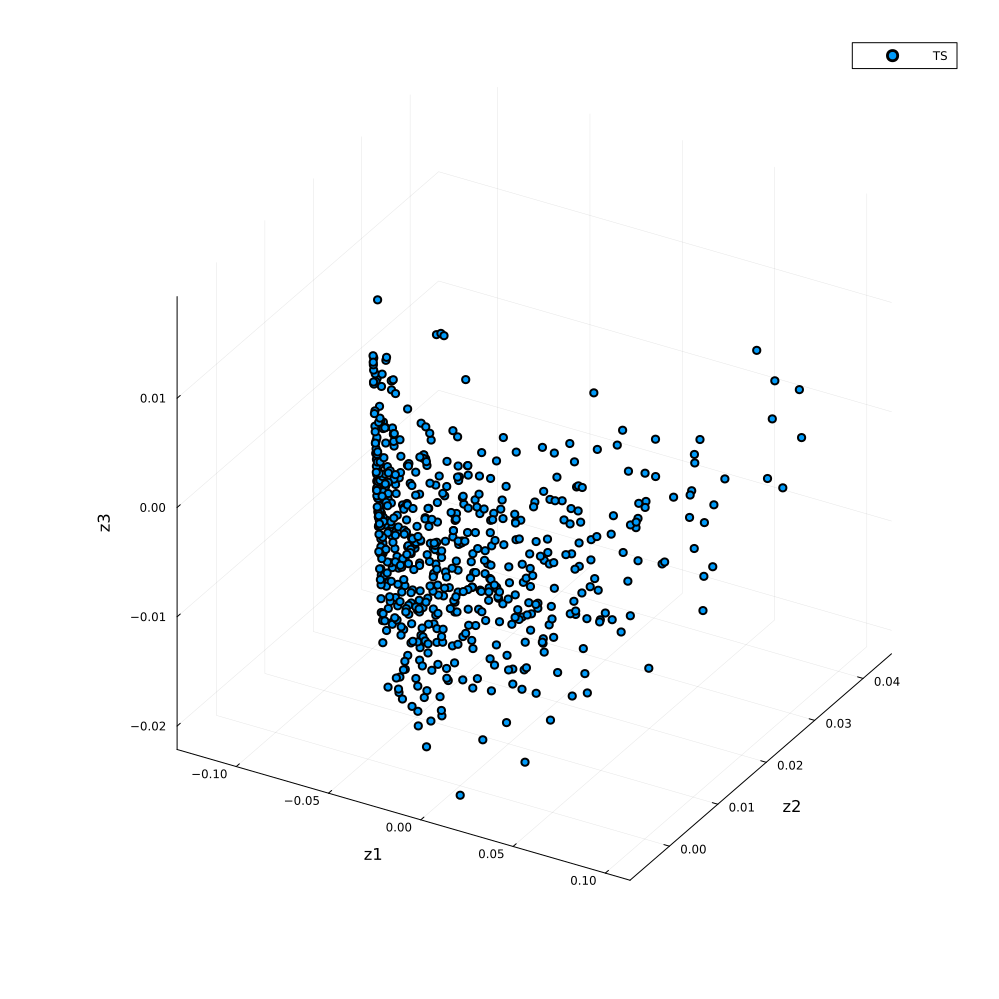

In [96]:
gr()
scatter(eachrow(Z_)...,xlabel="z1",ylabel="z2",zlabel="z3",label="TS",size=(1000,1000))

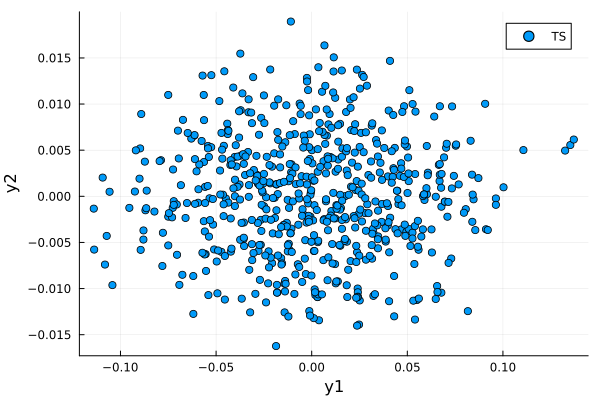

In [97]:
scatter(eachrow(Y_)...,xlabel="y1",ylabel="y2",label="TS")

## Test: TS generation via VS

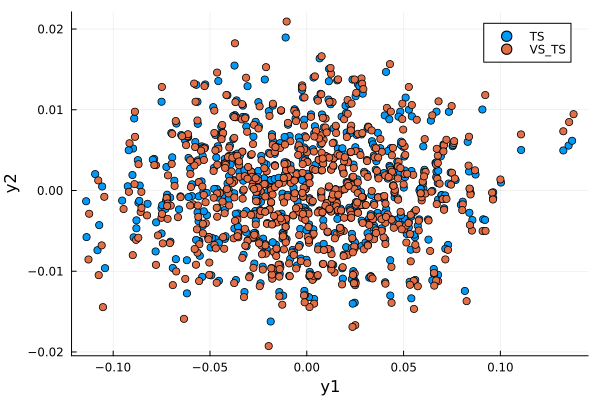

"G:\\My Drive\\Temp\\Comunication\\Presentation Potential Oct\\kPCA_isomap.svg"

In [98]:
Y_gen = []
for i in 1:n
    y_ = VectorSearch(Y_,conf[:,i])
    push!(Y_gen,y_)
end
Y_gen = reduce(hcat,Y_gen)
Err_TS_1 = norm(Y_gen-Y_)/norm(Y_)
display(scatter!(eachrow(Y_gen)...,xlabel="y1",ylabel="y2",label="VS_TS"))
Plots.savefig("G:/My Drive/Temp/Comunication/Presentation Potential Oct/kPCA_isomap.svg")

# Online

## Configuration to AFOS

### Single shape test

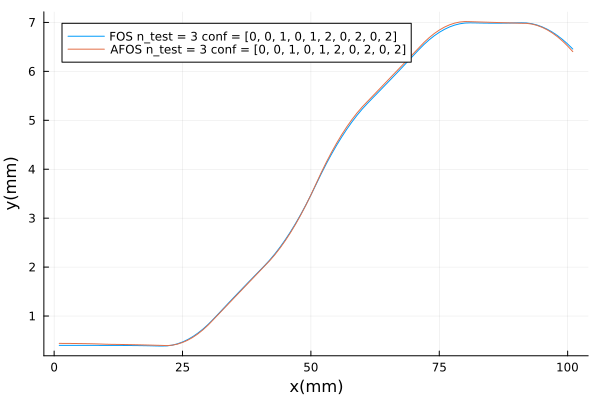

"G:\\My Drive\\Temp\\Comunication\\Presentation Potential Oct\\BCRM_nh10_ntest3.svg"

In [99]:
n_test = 3
nh = 4
y_gen = VectorSearch(Y_,conf_test[:,n_test])
x_gen = ReverseMap2(y_gen,conf_test[:,n_test],Y_,X,conf,nh,0)
NRMSE = norm(x_gen-X_test[:,n_test])/norm(X_test[:,n_test])
plot(1000*X_test[:,n_test],label="FOS n_test = $n_test conf = $(conf_test[:,n_test])",
legend = :topleft, xlabel = "x(mm)", ylabel = "y(mm)")
display(plot!(1000*x_gen,label="AFOS n_test = $n_test conf = $(conf_test[:,n_test])"))
Plots.savefig("G:/My Drive/Temp/Comunication/Presentation Potential Oct/BCRM_nh10_ntest3.svg")

### Multiple shapes test

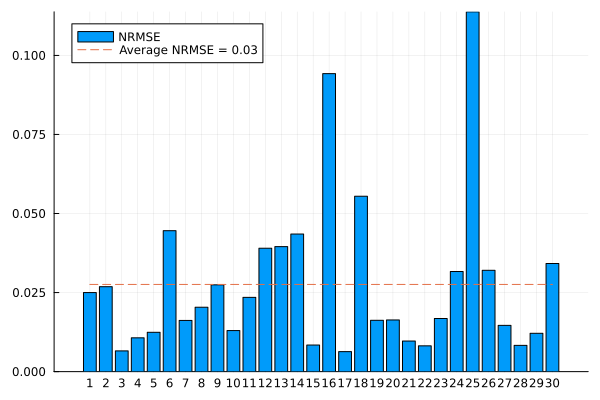

"G:\\My Drive\\Temp\\Comunication\\Presentation Potential Oct\\BCRM_nh10_Err30shapes.svg"

In [100]:
NRMSE_list = []
for n_test in 1:30 
    nh = 10
    y_gen = VectorSearch(Y_,conf_test[:,n_test])
    x_gen = ReverseMap2(y_gen,conf_test[:,n_test],Y_,X,conf,nh,0)
    NRMSE = norm(x_gen-X_test[:,n_test])/norm(X_test[:,n_test])
    push!(NRMSE_list,NRMSE)
end
avg_NRMSE = sum(NRMSE_list)/length(NRMSE_list)
bar(NRMSE_list,xticks=[1:30...],label="NRMSE")
display(plot!([1:30...],[avg_NRMSE for _ in 1:30],style=:dash,label = "Average NRMSE = $(round(avg_NRMSE,digits=2))"))
Plots.savefig("G:/My Drive/Temp/Comunication/Presentation Potential Oct/BCRM_nh10_Err30shapes.svg")


In [101]:
nh_list = []
for nh in 1:15 
    NRMSE_list = []
    for n_test in 1:30 
        y_gen = VectorSearch(Y_,conf_test[:,n_test])
        x_gen = ReverseMap2(y_gen,conf_test[:,n_test],Y_,X,conf,nh,0)
        NRMSE = norm(x_gen-X_test[:,n_test])/norm(X_test[:,n_test])
        push!(NRMSE_list,NRMSE)
    end
    avg_NRMSE = sum(NRMSE_list)/length(NRMSE_list)
    push!(nh_list,avg_NRMSE)
end


In [102]:
bar(nh_list,xticks=[1:15])


In [103]:
plot!([1:15...],[minimum(nh_list) for _ in 1:15],style=:dash,label = "Minimum average NRMSE = $(round(minimum(nh_list),digits=4))")

## FOS to configuration

### single shape test

#### VS generation of the design space for total search

In [42]:
conf_complete = []
for x1 in 0:2, x2 in 0:2, x3 in 0:2, x4 in 0:2, x5 in 0:2, x6 in 0:2, x7 in 0:2, x8 in 0:2, x9 in 0:2, x10 in 0:2
  push!(conf_complete,[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])
end
conf_complete = reduce(hcat,conf_complete)

Y_gen_complete = []
for c in eachcol(conf_complete)
    y_ = VectorSearch(Y_,c)
    push!(Y_gen_complete,y_)
end
Y_gen_complete = reduce(hcat,Y_gen_complete)

2×59049 Matrix{Float64}:
 -0.000468315  -0.000671836  -0.000264925  …  0.139157   0.138953   0.13936
  0.00041642    0.000154318   0.000659008     0.0107192  0.0104571  0.0109618

n_test simulation running = 1 at idx 1
__________________________________________________________________________________________
|                                                                                         
|                                 MULTISIMO LAB                                           
|                                                                                          
|            Executing MIMOSA Driver for ElectroMechanics Problem                                    
|                                                                                         
|            Problem name Temp/PB-S10-O2-PL_0_0_0_0_2_1_1_1_1_2_ϕ20000.0                                                          
|                                                                                         
|                                                                                         
|            pname    | Temp/PB-S10-O2-PL_0_0_0_0_2_1_1_1_1_2_ϕ20000.0
|            ptype 

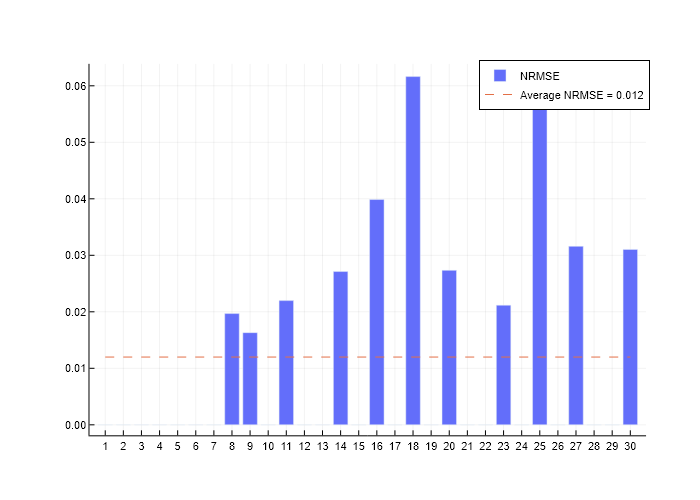

In [58]:
Err = []
# plts = []
tol = 1e-8
p = plot()
for n_test in 1:30
    x_test = X_test[:,n_test]
    p = plot!(X_test[:,n_test],label="Test FOS $(conf_test[:,n_test])")
    y_new = NewData(x_test,Κ,neighbors,G,Z_,D_G_sym)
    kdtree = KDTree(Y_gen_complete; leafsize = 10)
    idxs, dists = knn(kdtree, y_new, 100, true)
    conf_test_i = conf_complete[:,idxs[1]]
    println("n_test simulation running = $n_test at idx 1")
    ph, chache = main(; get_parameters(10, conf_test_i, 2000.0)...)
    pl_, x_FOS = plt_cl(ph,conf_test_i)
    p = plot!(x_FOS,label="First found FOS $(conf_test[:,n_test])")
    E_ = norm(x_test-x_FOS)/norm(x_test)
    println("Error found at nh 1 = $E_")
    if E_ < tol
        push!(Err,E_)
        println("Error was under tolerance $tol")
    else
        Err_ = []
        println("Error was not under tolerance")
        for idx in idxs
            x_gen = ReverseMap2(Y_gen_complete[:,idx],
            conf_complete[:,idx],Y_,X,conf,10,0.0)
            push!(Err_,norm(x_test-x_gen)/norm(x_test))
            # push!(Err_,Κ(x_test,x_gen))
            print("\ridx running = $idx")
        end
        index = argmin(Err_)
        x_gen = ReverseMap2(Y_gen_complete[:,idxs[index]],
            conf_complete[:,idxs[index]],Y_,X,conf,10,0.0)
        p = plot!(x_gen,label="Search in Rd AFOS $(conf_test[:,n_test])")
        if idxs[index]≠idxs[1]
            println("New nh found via RM")
            println("$(idxs[index]) - $(idxs[1])")
            # push!(Err,Err_)
            # push!(plts,p)
            conf_test_i = conf_complete[:,idxs[index]]
            println("n_test simulation running = $n_test")
            ph, chache = main(; get_parameters(10, conf_test_i, 2000.0)...)
            pl_, x_FOS = plt_cl(ph,conf_test_i)
            p = plot!(x_FOS,label="Second found FOS $(conf_test[:,n_test])")
            push!(Err,norm(x_test-x_FOS)/norm(x_test))
            println("Error found at new nh = $(norm(x_test-x_FOS)/norm(x_test))")
        else
            println("No new nh found")
            push!(Err,E_)
        end
    end
end


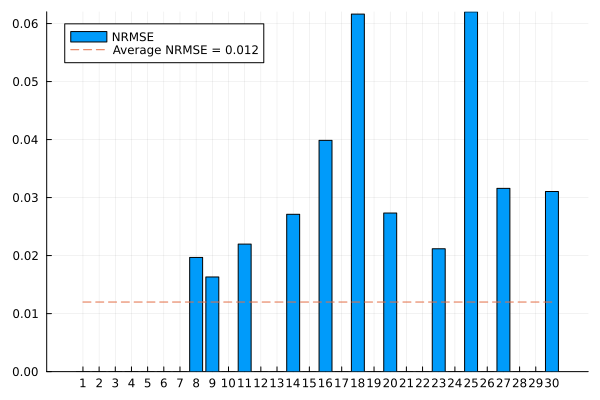

"G:\\My Drive\\Temp\\Comunication\\Presentation Potential Oct\\Err_FOStoConf_30shapes.svg"

In [105]:
bar(Err,xticks=[1:lastindex(Err)...], type=:bar, label="NRMSE",config = config)
p_ = plot!([1:lastindex(Err)...],[sum(Err)/length(Err) for _ in 1:lastindex(Err)],style=:dash,
label="Average NRMSE = $(round(sum(Err)/length(Err),digits=4))",config = config)
display(p_)
Plots.savefig("G:/My Drive/Temp/Comunication/Presentation Potential Oct/Err_FOStoConf_30shapes.svg")